# Bike Rental Demand Prediction using Autogluon.

## Autogluon:
### Autogluon is an automated way to do machine learning. It automates everything, from Data Preprocessing to fitting multiple Machine Learning, choosing best model for prediction and providing leaderboard. 

## Dataset: Bike Sharing Demand
### Dataset Link: https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset

## Problem Statement:
### Perform some basic Data Analysis on the given dataset. Furthermore, train machine learning models using autogluon automatically. Also, make future predictions.

## Task To-do:
1. Basic Data Analysis
2. Machine Learning model
3. Future Time Series Prediction

# Importing Libs 

In [1]:
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
from autogluon.tabular import TabularPredictor # Deals with structured tabular data
import matplotlib.pyplot as plt
import seaborn as sns

# Load data 

In [3]:
df = pd.read_csv('./bike_sharing_dataset//day.csv')

In [4]:
# Display top rows
display(df.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
# Display bottom rows
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


# Data Analysis

In [6]:
# No. of rows and cols
print(df.shape)

(731, 16)


In [7]:
# Null values
print(df.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [8]:
# Duplicates
df.duplicated().sum()

np.int64(0)

In [9]:
# Groupby data as per each day
df_groupby_dte = df.groupby('dteday')['cnt'].sum()
df_groupby_month = df.groupby('mnth')['cnt'].sum()

In [10]:
df_groupby_dte.index

Index(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04', '2011-01-05',
       '2011-01-06', '2011-01-07', '2011-01-08', '2011-01-09', '2011-01-10',
       ...
       '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25', '2012-12-26',
       '2012-12-27', '2012-12-28', '2012-12-29', '2012-12-30', '2012-12-31'],
      dtype='object', name='dteday', length=731)

In [11]:
df_groupby_month.index

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='mnth')

In [12]:
df_groupby_dte.values

array([ 985,  801, 1349, 1562, 1600, 1606, 1510,  959,  822, 1321, 1263,
       1162, 1406, 1421, 1248, 1204, 1000,  683, 1650, 1927, 1543,  981,
        986, 1416, 1985,  506,  431, 1167, 1098, 1096, 1501, 1360, 1526,
       1550, 1708, 1005, 1623, 1712, 1530, 1605, 1538, 1746, 1472, 1589,
       1913, 1815, 2115, 2475, 2927, 1635, 1812, 1107, 1450, 1917, 1807,
       1461, 1969, 2402, 1446, 1851, 2134, 1685, 1944, 2077,  605, 1872,
       2133, 1891,  623, 1977, 2132, 2417, 2046, 2056, 2192, 2744, 3239,
       3117, 2471, 2077, 2703, 2121, 1865, 2210, 2496, 1693, 2028, 2425,
       1536, 1685, 2227, 2252, 3249, 3115, 1795, 2808, 3141, 1471, 2455,
       2895, 3348, 2034, 2162, 3267, 3126,  795, 3744, 3429, 3204, 3944,
       4189, 1683, 4036, 4191, 4073, 4400, 3872, 4058, 4595, 5312, 3351,
       4401, 4451, 2633, 4433, 4608, 4714, 4333, 4362, 4803, 4182, 4864,
       4105, 3409, 4553, 3958, 4123, 3855, 4575, 4917, 5805, 4660, 4274,
       4492, 4978, 4677, 4679, 4758, 4788, 4098, 39

In [13]:
df_groupby_month.values

array([134933, 151352, 228920, 269094, 331686, 346342, 344948, 351194,
       345991, 322352, 254831, 211036])

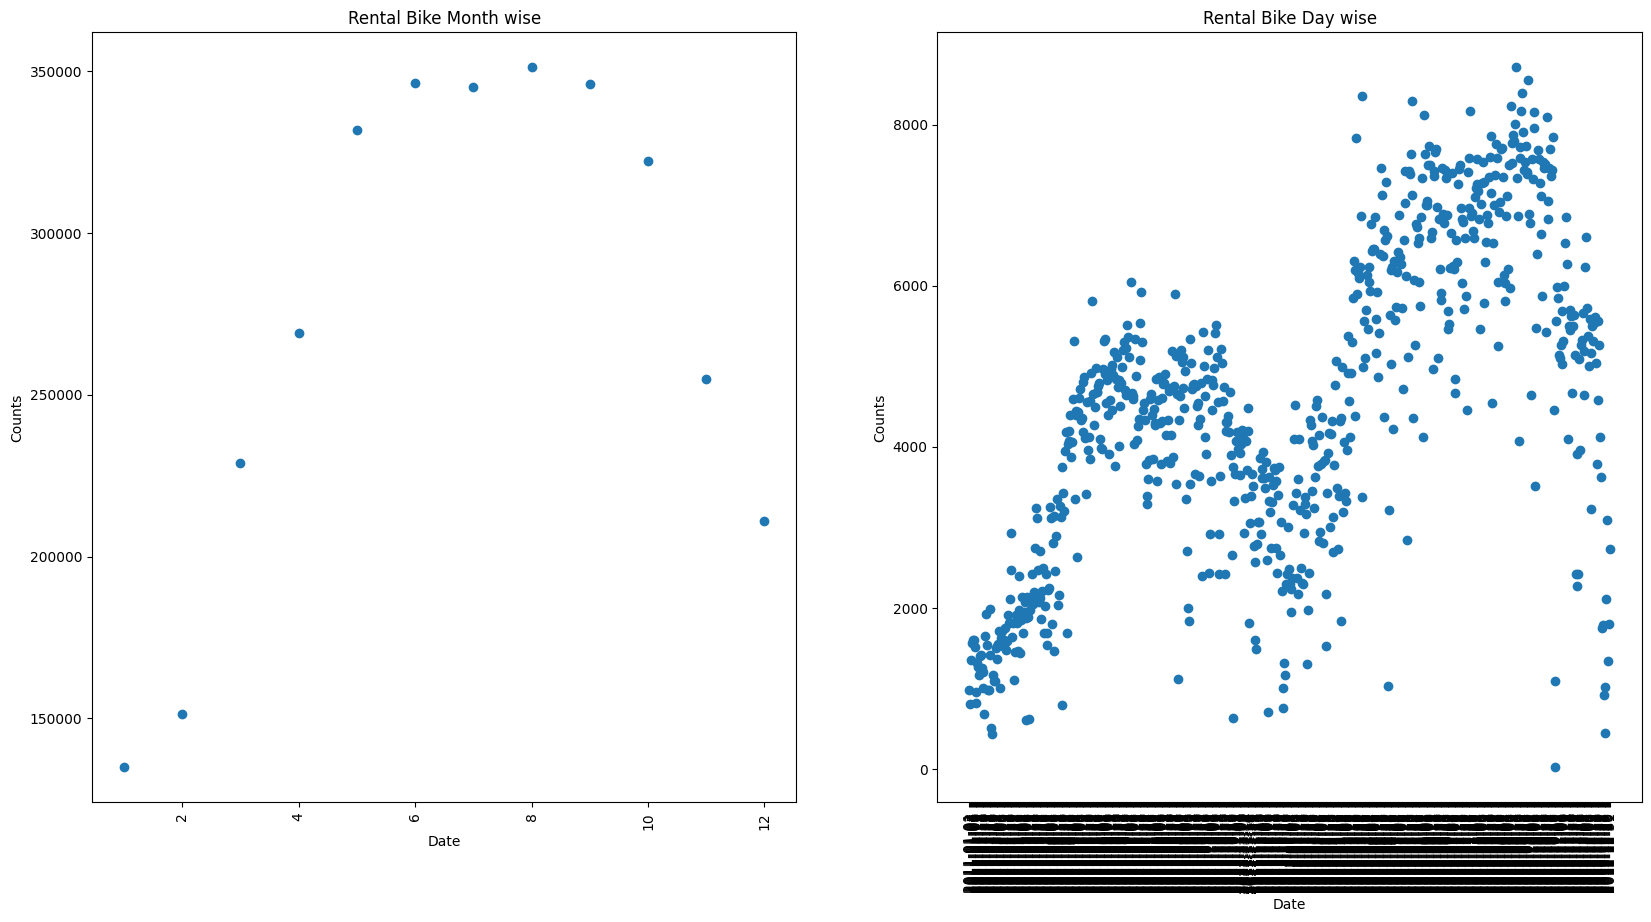

In [14]:
# Count and dteday and month
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.scatter(df_groupby_month.index, df_groupby_month.values)
plt.xlabel("Date")
plt.ylabel("Counts")
plt.title("Rental Bike Month wise")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.scatter(df_groupby_dte.index, df_groupby_dte.values)
plt.xlabel("Date")
plt.ylabel("Counts")
plt.title("Rental Bike Day wise")
plt.xticks(rotation=90)
plt.show()

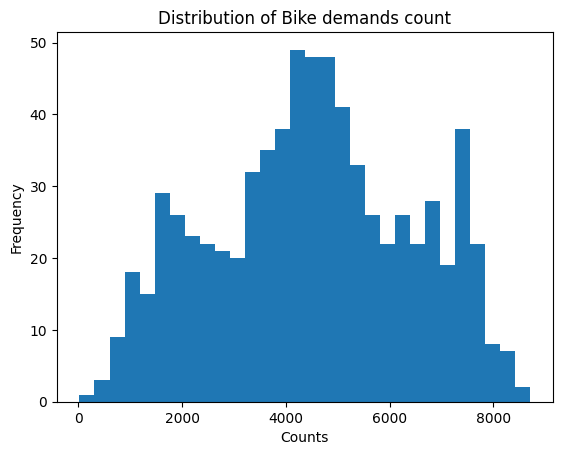

In [15]:
# Histogram - Cnt
plt.hist(x = 'cnt', data = df, bins=30)
plt.xlabel("Counts")
plt.ylabel("Frequency")
plt.title("Distribution of Bike demands count")
plt.show()

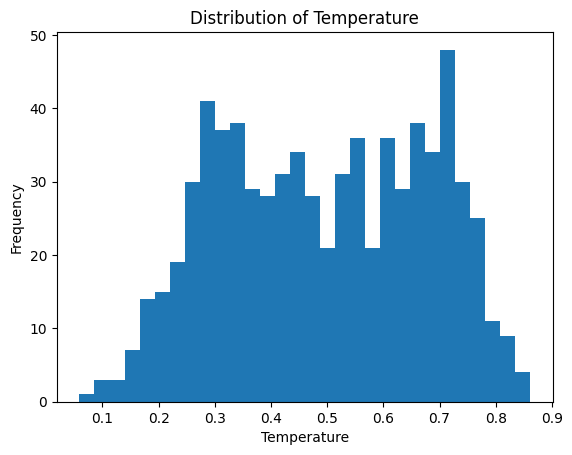

In [16]:
# Histogram - temperature
plt.hist(x = 'temp', data = df, bins=30)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Distribution of Temperature")
plt.show()

# Autogluon Machine Learning

In [17]:
# First it understand that target is cnt
# Preprocess data automatically
# Then, it drops the column instant (id) and dteday (as we have more granular data)
# Finally, it fits multiple models, validates on validation set automatically, and predicts.
# Then, gives the metrics for each in a leaderboard.
predictor = TabularPredictor(label="cnt").fit(df.drop(columns=["instant", "dteday"]))

No path specified. Models will be saved in: "AutogluonModels\ag-20250526_124344"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.12.1
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          12
Memory Avail:       7.18 GB / 15.73 GB (45.6%)
Disk Space Avail:   392.72 GB / 465.75 GB (84.3%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'       

[1000]	valid_set's rmse: 152.902
[2000]	valid_set's rmse: 152.071


	-151.7582	 = Validation score   (-root_mean_squared_error)
	1.25s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBM ...
	-162.0954	 = Validation score   (-root_mean_squared_error)
	0.6s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-149.7015	 = Validation score   (-root_mean_squared_error)
	0.49s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: CatBoost ...
	-112.7298	 = Validation score   (-root_mean_squared_error)
	52.84s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-146.0228	 = Validation score   (-root_mean_squared_error)
	0.45s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-127.735	 = Validation score   (-root_mean_squared_error)
	1.07s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
	-154.8739	 = Validation score   (-root_mean_squared_error)
	2.63s	 = Training   runtime
	0.01s	 = Validation 

# Evaluate the model

In [18]:
metrics = pd.DataFrame(list(predictor.evaluate(df).values()), columns=['Metrics'], index=list(predictor.evaluate(df).keys()))

In [19]:
display(metrics)

,Metrics
root_mean_squared_error,-44.405556
mean_squared_error,-1971.853638
mean_absolute_error,-29.290127
r2,0.999474
pearsonr,0.999757
median_absolute_error,-21.206543


# Testing/ Predictions

In [20]:
preds = predictor.predict(df)
display(preds.head())

0    1125.616699
1     925.901794
2    1389.465332
3    1546.836426
4    1594.165649
Name: cnt, dtype: float32

# Models Leaderboard

In [21]:
predictor.leaderboard(df, silent=True)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-44.405556,-68.740791,root_mean_squared_error,0.094496,0.031888,60.983392,0.002005,0.000000,0.012936,2,True,12
1,KNeighborsDist,-48.052168,-107.155140,root_mean_squared_error,0.016965,0.016060,0.004212,0.016965,0.016060,0.004212,1,True,2
2,CatBoost,-50.552026,-112.729762,root_mean_squared_error,0.037198,0.000000,52.838223,0.037198,0.000000,52.838223,1,True,6
3,LightGBMLarge,-65.680951,-145.625895,root_mean_squared_error,0.012028,0.004167,0.991461,0.012028,0.004167,0.991461,1,True,11
4,XGBoost,-69.451870,-154.873868,root_mean_squared_error,0.024151,0.009569,2.627326,0.024151,0.009569,2.627326,1,True,9
5,LightGBMXT,-72.584761,-151.758217,root_mean_squared_error,0.025805,0.000000,1.245236,0.025805,0.000000,1.245236,1,True,3
6,LightGBM,-76.529524,-162.095411,root_mean_squared_error,0.012028,0.002004,0.596769,0.012028,0.002004,0.596769,1,True,4
7,KNeighborsUnif,-77.441635,-114.083996,root_mean_squared_error,0.018063,0.022274,1.599718,0.018063,0.022274,1.599718,1,True,1
8,RandomForestMSE,-78.321222,-149.701456,root_mean_squared_error,0.085386,0.037050,0.486966,0.085386,0.037050,0.486966,1,True,5
9,ExtraTreesMSE,-79.898195,-146.022753,root_mean_squared_error,0.087755,0.048060,0.453484,0.087755,0.048060,0.453484,1,True,7


C:\Users\Admin\AppData\Local\Temp\ipykernel_25028\1472320335.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="score_val", y="model", data=leaderboard_df, palette="viridis")


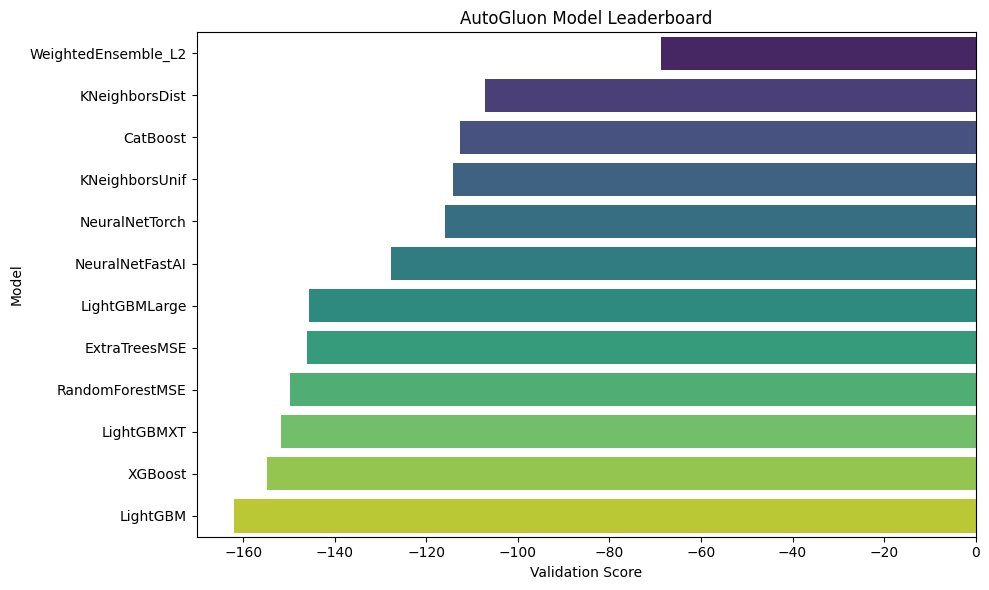

In [22]:
# Get the leaderboard as a DataFrame
leaderboard_df = predictor.leaderboard(df, silent=True)

# Sort by validation score (descending if higher is better)
leaderboard_df = leaderboard_df.sort_values(by="score_val", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="score_val", y="model", data=leaderboard_df, palette="viridis")

plt.xlabel("Validation Score")
plt.ylabel("Model")
plt.title("AutoGluon Model Leaderboard")
plt.tight_layout()
plt.show()


# Model Prediction Visuals

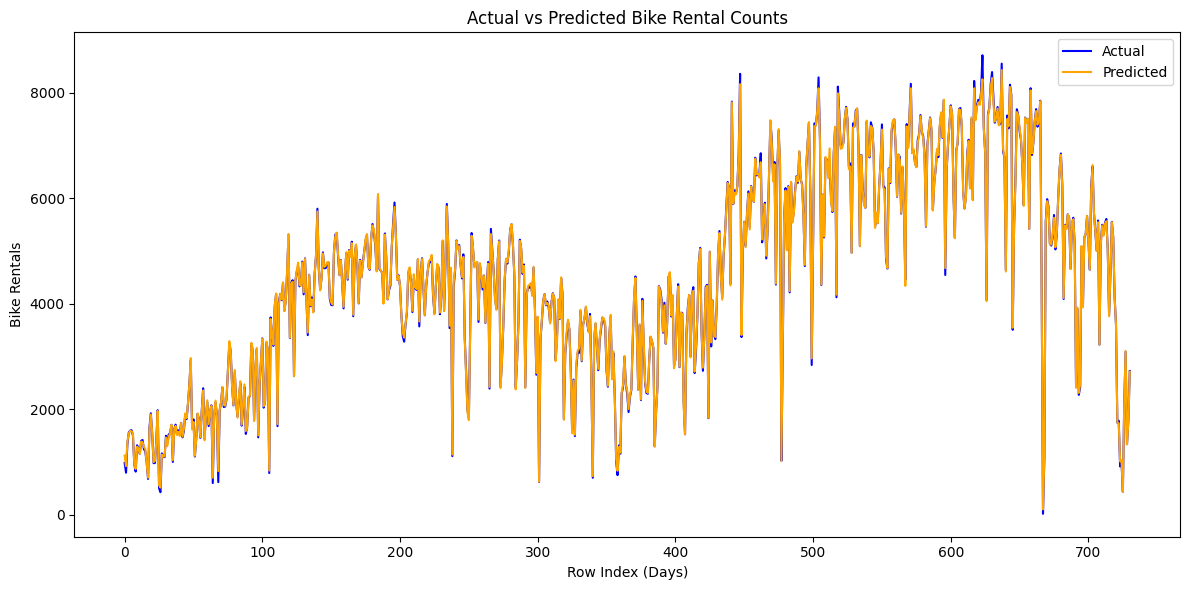

In [23]:
# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(df["cnt"].values, label="Actual", color="blue")
plt.plot(preds.values, label="Predicted", color="orange")
plt.xlabel("Row Index (Days)")
plt.ylabel("Bike Rentals")
plt.title("Actual vs Predicted Bike Rental Counts")
plt.legend()
plt.tight_layout()
plt.show()


# Best model

In [24]:
# Get the top model name (first row)
best_model = leaderboard_df.iloc[0]['model']
print("Best model used for prediction:", best_model)

Best model used for prediction: WeightedEnsemble_L2


# Future Predictions

### Predicting future 1 month prediction

In [25]:
!pip install prophet


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
from prophet import Prophet 

In [27]:
# For prophet, we just need date time and target column
df_prophet = pd.read_csv("./bike_sharing_dataset//day.csv")
df_prophet = df_prophet[['dteday', 'cnt']]

df_prophet.head()

,dteday,cnt
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600


In [28]:
# Rename column, as required
df_prophet = df_prophet.rename(columns={'dteday': 'ds', 'cnt': 'y'})

df_prophet.head()

,ds,y
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600


In [29]:
# Check whether date is in proper date time format 
df_prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      731 non-null    object
 1   y       731 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


In [30]:
# Convert ds to Date time
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

df_prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      731 non-null    datetime64[ns]
 1   y       731 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.6 KB


In [31]:
df_prophet.head()

,ds,y
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600


In [32]:
df_prophet.tail()

,ds,y
726,2012-12-27,2114
727,2012-12-28,3095
728,2012-12-29,1341
729,2012-12-30,1796
730,2012-12-31,2729


* Model Fitting

In [33]:
model = Prophet()
model.fit(df_prophet)

DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:Adding TBB (D:\Projects\Bike Rental Demand\venv\Lib\site-packages\prophet\stan_model\cmdstan-2.33.1\stan\lib\stan_math\lib\tbb) to PATH
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: C:\Users\Admin\AppData\Local\Temp\tmpqzvdx_gt\a497sre9.json
DEBUG:cmdstanpy:input tempfile: C:\Users\Admin\AppData\Local\Temp\tmpqzvdx_gt\83tlmaw2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['D:\\Projects\\Bike Rental Demand\\venv\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=35214', 'data', 'file=C:\\Users\\Admin\\AppData\\Local\\Temp\\tmpqzvdx_gt\\a497sre9.json', 'init=C:\\Users\\Admin\\AppData\\Local\\Temp\\tmpqzvdx_gt\\83tlmaw2.json', 'output', 'file=C:\\Users\\Admin\\AppData\\Local\\Temp\\tmpqzvdx_gt\\prophet_model4151apfi\\prophet_model-20250526181458.csv', 

* Future preds

In [34]:
# Create future DataFrame
future = model.make_future_dataframe(periods=31, freq='D') # Addition for 1 Month

future.tail(10)

,ds
752,2013-01-22
753,2013-01-23
754,2013-01-24
755,2013-01-25
756,2013-01-26
757,2013-01-27
758,2013-01-28
759,2013-01-29
760,2013-01-30
761,2013-01-31


In [35]:
# Make predictions
forecast = model.predict(future)

In [36]:
# Next Month Bike Demand
display(forecast[['ds', 'yhat']].tail(7))

,ds,yhat
755,2013-01-25,5617.342683
756,2013-01-26,5510.214595
757,2013-01-27,5174.421027
758,2013-01-28,5268.446477
759,2013-01-29,5420.859341
760,2013-01-30,5444.083773
761,2013-01-31,5549.214926


* Visualizing future preds

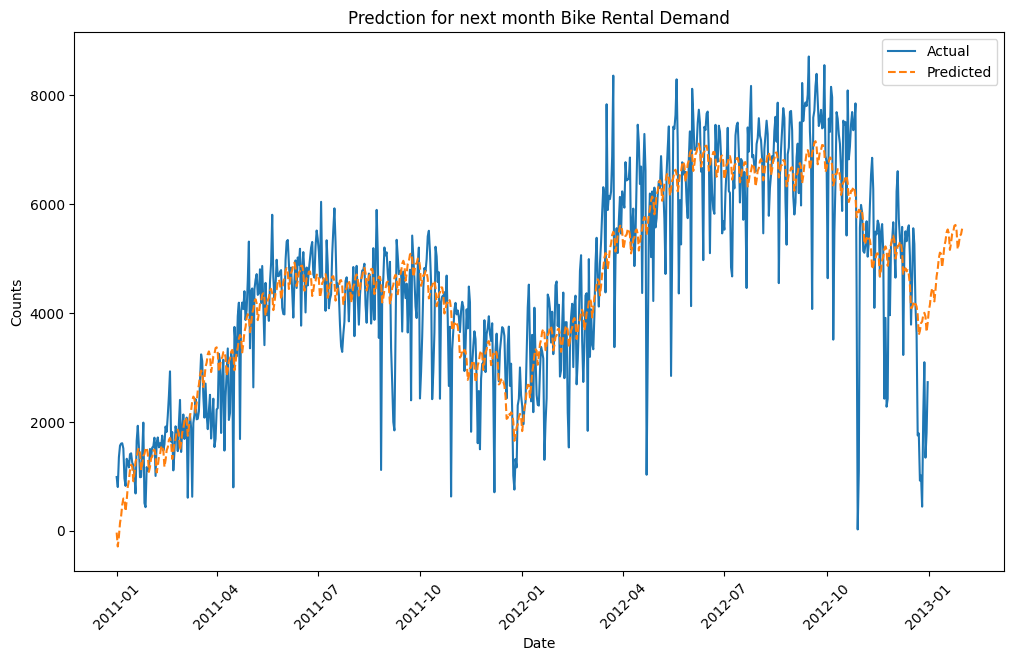

In [41]:
# Plot actual vs. predicted
plt.figure(figsize=(12, 7))
plt.plot(df_prophet['ds'], df_prophet['y'], label="Actual") # True
plt.plot(forecast['ds'], forecast['yhat'], label="Predicted", linestyle="--") # Pred
plt.legend()
plt.xlabel("Date")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.title("Predction for next month Bike Rental Demand")
plt.show()

### Findings:
#### We observe an upward trend in bike demand, which is based on the patterns learned by the Prophet model from data spanning the past two years.

#### In 2011, the following trends are evident:
* From January to June, bike demand increases significantly.
* From July to September, the demand plateaus.
* From October to December, there is a significant decrease in demand, likely due to people preferring to stay indoors during colder months.

#### In 2012, a similar pattern was observed. Based on this inference, the model predicts that the upcoming months will follow a comparable trend.

### Suggestions:
1. In the first and second quarters of the year, the provider should ensure that there is an adequate supply of bikes to meet the rising demand.
2. In the last quarter of the year, the provider may consider reducing the number of bikes available by placing some in repair or maintenance.
3. The provider could introduce seasonal promotions or discounts during the winter months to incentivize usage and maintain demand during the colder period.
4. The provider could innovate a new type of bike at a lower cost that is designed to help customers stay warmer during winter rides. This could include features like heated handlebars or insulated seating. By addressing the discomfort of cold weather, an upward trend in winter demand might be observed.
5. The provider could build bike stations equipped with heating elements or sheltered areas where customers can warm up before or after their rides. Offering a more comfortable and inviting space could encourage higher usage during colder months, potentially increasing overall demand.


# Conclusion:

### In this project, we covered basic data analysis and performed machine learning using Autogluon. 